## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
no_rows = df.shape[0]
no_rows

294478

c. The number of unique users in the dataset.

In [4]:
unique_users = df.user_id.nunique()
unique_users

290584

d. The proportion of users converted.

In [5]:
users_converted = df.query("converted == 1")
users_converted_prop = users_converted.shape[0] / no_rows
users_converted_prop

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
((df.landing_page == 'new_page') ^ (df.group == 'treatment')).mean() * df.shape[0]

3893.0

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.copy()

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

3893

**Removing all landing_page and group that don't match**

In [10]:
df2= df[~ ((df.landing_page == 'new_page') ^ (df.group == 'treatment'))]
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
unique_users_2 = df2.user_id.nunique()
unique_users_2

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
duplicate_id = df2[df2.user_id.duplicated()]
duplicate_id.user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
duplicate_id

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:

df2.drop_duplicates(subset='user_id', inplace=True)
df2.reset_index(drop=True, inplace=True) 

<ipython-input-14-e95141bbe208>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset='user_id', inplace=True)


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
prop_conv = df2.converted.mean()
prop_conv

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2_control = df2.query("group == 'control'")
prop_conv_control = df2_control.converted.mean()
prop_conv_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2_treatment = df2.query("group == 'treatment'")
prop_conv_treatment = df2_treatment.converted.mean()
prop_conv_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
new_page_df = df2.query("landing_page == 'new_page'")
new_page_prop = new_page_df.shape[0] / df2.shape[0]
new_page_prop

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**The old page conversion rate (12.03%) are slightly higher than the new page conversion (11.8%); however, they are too close to conclude that either of them is better than the other.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

  - **$H_{0}$** : **$p_{new}$** - **$p_{old}$**  <= 0
  - **$H_{1}$** : **$p_{new}$** - **$p_{old}$**  > 0 
 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
n_new =  df2.query("group == 'control'").shape[0]
n_new

145274

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old =  df2.query("group == 'treatment'").shape[0]
n_old

145310

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([0,1],size = n_new, p = [1-p_new,p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([0,1],size = n_old, p = [1-p_new,p_new])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
sim_diff = new_page_converted.mean() - old_page_converted.mean()
sim_diff

0.0019911049753261745

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
new_page_converted_sim = np.random.binomial(n_new,p_new,10000) /n_new
old_page_converted_sim = np.random.binomial(n_old,p_old,10000) /n_old
n_diff = new_page_converted_sim - old_page_converted_sim
p_diffs = np.array(n_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

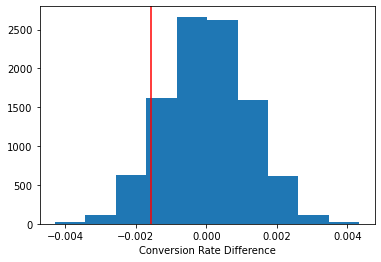

In [27]:
plt.hist(p_diffs);
plt.xlabel('Conversion Rate Difference')

obs_diff = prop_conv_treatment - prop_conv_control
plt.axvline(x=obs_diff,color = "red")

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
(p_diffs > obs_diff).mean()

0.9068

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value calculated in part j is called the p-value. 
It is called statistical significance in scientific studies**


**If it is large, this means that we fail to reject the null and vice versa. Deciding if it is small or large depends on the defined threshold for each analysis.**

**This value means that if we have type 1 error of 5% then p-value must be less than this threshold to reject the null hypothesis**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control' and converted == 1").shape[0]
convert_new = df2.query("group == 'treatment' and converted == 1").shape[0]
n_old = df2.query("group == 'control'").shape[0]
n_new = df2.query("group == 'treatment'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [30]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([convert_new, convert_old],[n_new, n_old],alternative = 'larger')
print('P-value = {0:0.4f}\nZ_stat = {0:0.4f}'.format(pval,stat))

P-value = 0.9051
Z_stat = 0.9051


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**These Results match the results computed in part j and k which means that P-value is very large and that is why we fail to reject the null hypothesis**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**we will perform logistic regression to predict the outcomes as conversion is a binary choice {0,1}**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:

df2['intercept'] = 1 
df2[['ab_page','old_page']] = pd.get_dummies(df2.landing_page) 
df2.drop(columns=['old_page'],axis=1,inplace=True) #we dropped 'old_page' as we only need ab_page column
df2.head()

<ipython-input-31-a67d8ab19e45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1
D:\anaconda\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
D:\anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [32]:
# logistic regression model
logic_model = sm.Logit(df2.converted, df2[['intercept','ab_page']])
results = logic_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 Feb 2021   Pseudo R-squ.:               8.077e-06
Time:                        18:26:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

**p-value associated with ab_page is 0.190**

**it differs from Part II because The null hypothesis associated with the regression model is testing whether the coefficients are equal to zero and the alternative is testing whether the coefficients are not equal to zero which produces two-tailed p-values. However, the hypothesis test in Part II is testing whether the difference is lower than or equal to zero in the null hypothesis or it is larger than zero in the alternative hypothesis which produces one-tailed p-value.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Looking at the regression model, it is shown that ab_page is not a good predictor of the conversion. So it might be a good idea to add other factors like time and segments of users.**

**However, adding other factors can make it hard to interpret the results as the multicollinearity could present in this case as the factors may be correlated with each other.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 


In [34]:
df_countries = pd.read_csv('countries.csv')  
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [35]:
df_countries.country.unique().tolist()

['UK', 'US', 'CA']

In [36]:
#joining user data frame with country data frame based on the index
df4 = df2.join(df_countries.set_index('user_id'), on='user_id') 

In [37]:
df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [38]:
df4[['CA','UK','US']] = pd.get_dummies(df4.country) 
df4.drop(columns=['CA'],axis=1,inplace=True) #we dropped one of the dummy variables
df4.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,0,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,0,0


In [39]:
# logistic regression model
logic_model_2 = sm.Logit(df4.converted, df4[['intercept','ab_page','UK','US']]) 
results = logic_model_2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 13 Feb 2021   Pseudo R-squ.:               2.323e-05
Time:                        18:26:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""


**The p-values of the dummy variables of the countries suggest that they have no statistical significance in predicting conversion, and there are very small differences in conversion based on which country as the user from UK and US will be 1.027 times and 1.028 times, respectively but more likely to convert compared to CA.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
#Creating interactions between page and country
df4 ['UK_Page'] = df4.ab_page * df4.UK
df4 ['US_Page'] = df4.ab_page * df4.US

In [41]:
# logistic regression model
logic_model_3 = sm.Logit(df4.converted, df4[['intercept','ab_page','UK','US','UK_Page','US_Page']]) 
results = logic_model_3.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 13 Feb 2021   Pseudo R-squ.:               3.482e-05
Time:                        18:26:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_Page        0.0783      0.057      1.378      0.168      -0.033       0.190
US_Page        0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""


**Again, the result suggests that the effect of interaction between page and country has no statistical significance on conversion as p-value is not lower than the 5% threshold**

In [42]:
df4.timestamp = pd.to_datetime(df4.timestamp)

In [43]:
df4.timestamp.max() - df4.timestamp.min()

Timedelta('21 days 23:59:49.081927')

## Conclusion

1. **Based on the results of the analysis, we can't confirm any significant difference in conversion based on the page, country, or even the interaction between them.**

2. **As shown above, the data is approximately collected in 22 days which may not be long enough for the results to  reflect the differences in conversion.**